In [37]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

In [38]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

In [39]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_3 import full_scale_df_3 as full_scale_df

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [41]:
cols_to_drop = ['formula', 'trace', 'strategy']

In [42]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [43]:
final_df = clean_df(full_scale_df, cols_to_drop)

In [44]:
X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [45]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
kn_classifier.fit(X_train, y_train)

kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred

0.9650493169147828

In [46]:
final_full_df = clean_df(full_scale_df, cols_to_drop)


In [47]:

f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, TARGET)

kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
classifier = kn_classifier.fit(f_X_train, f_y_train)

mean_accuracy = classifier.score(f_X_test, f_y_test)
mean_accuracy

0.9650493169147828

In [48]:
pred_y = classifier.predict(f_X_test)
f1_score(pred_y, f_y_test, average=None)

array([0.94724654, 0.962868  , 0.98481244])

## Regression

In [49]:
final_full_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,693,694,695,696,697,698,699,700,701,702
0,3073,1,3,6,1.00,12,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3073,1,2,3,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3073,1,2,3,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3073,1,2,3,1.00,4,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3073,1,2,3,1.00,4,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063,5356,6,18,52,7.98,1852,1,2,0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16064,5356,6,27,26,2.87,876,2,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16065,5356,6,19,118,17.25,3989,2,-1,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16066,5356,6,27,176,19.33,2225,2,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression - Progressions

In [50]:
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'nb_progressions')

In [51]:


regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)


0.6967194405548505

0.6967194405548505

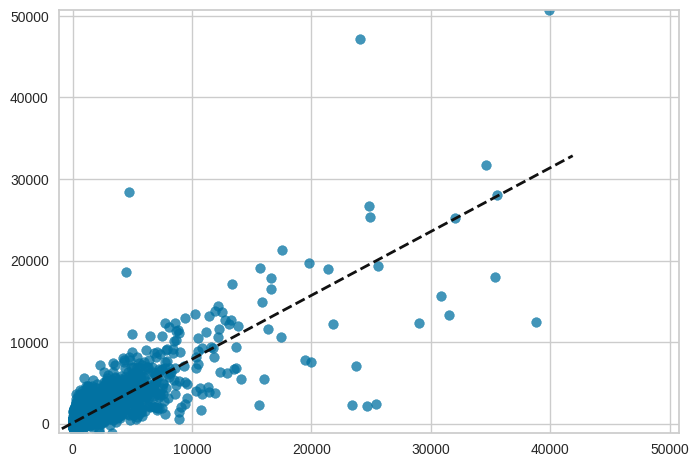

In [52]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


# sns.regplot(x="total_bill", y="tip", data=tips);

In [53]:
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

### SVM

In [54]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)

### Neural networks (MLPRegressor)

In [55]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000)
t_regr = regr.fit(f_X_train, f_y_train)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
regr.score(f_X_test, f_y_test)

0.5085252053921727

In [57]:
import pickle

with open("finalized_mlp_regressor",'wb') as f:
    pickle.dump(t_regr, f)

In [58]:
final_full_df


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,693,694,695,696,697,698,699,700,701,702
0,3073,1,3,6,1.00,12,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3073,1,2,3,1.00,3,1,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3073,1,2,3,1.00,8,2,-1,-1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3073,1,2,3,1.00,4,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3073,1,2,3,1.00,4,1,2,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16063,5356,6,18,52,7.98,1852,1,2,0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16064,5356,6,27,26,2.87,876,2,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16065,5356,6,19,118,17.25,3989,2,-1,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16066,5356,6,27,176,19.33,2225,2,0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.5085252053921727

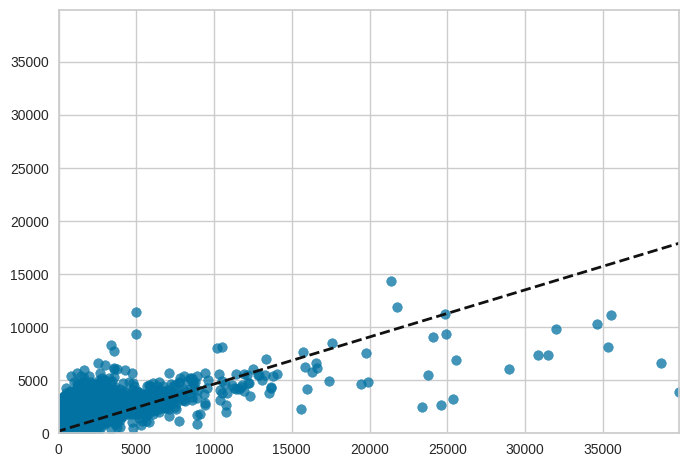

In [59]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [60]:
visualizer.show()                 # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [61]:
### Linear Regression - N. messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'num_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.47816493471091115

0.47816493471091115

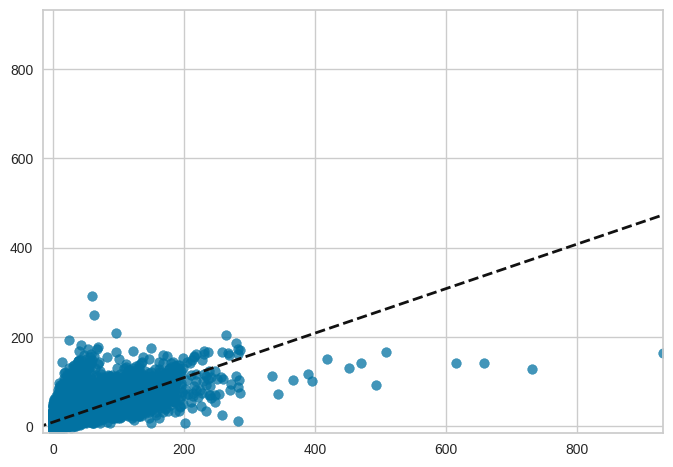

In [62]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [63]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [64]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5635927156280385

0.5635927156280385

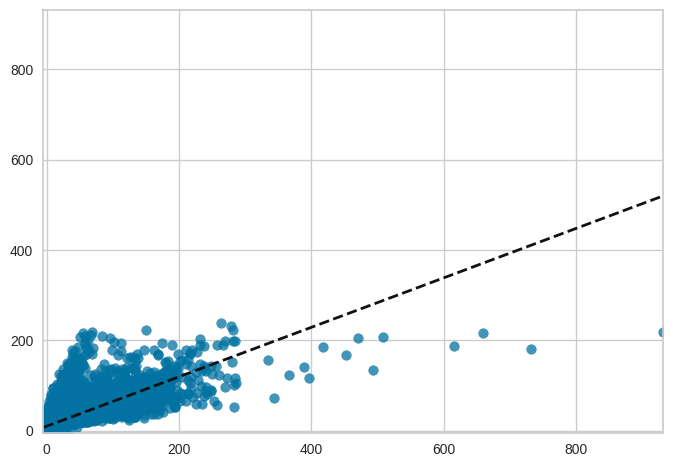

In [65]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [66]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
### Linear Regression - Size of the messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'size_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.3221066814947887

0.3221066814947887

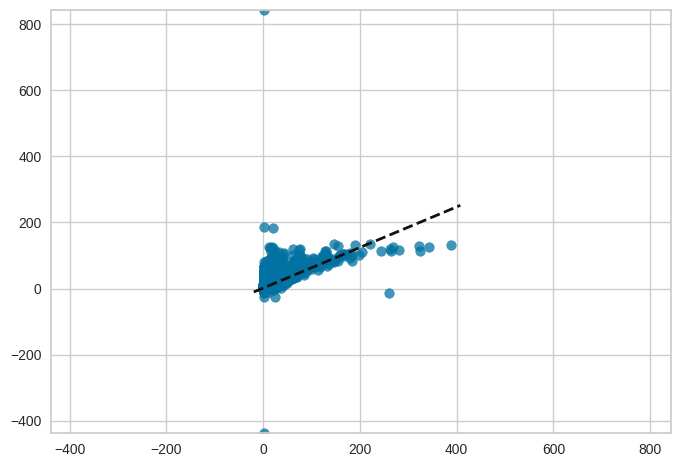

In [68]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)

In [69]:
visualizer.show()  # Finalize and render the figure


<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [70]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.cache/pypoetry/virtualenvs/distributed-monitor-qCzmrR0W-py3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8285412101440013

0.8285412101440013

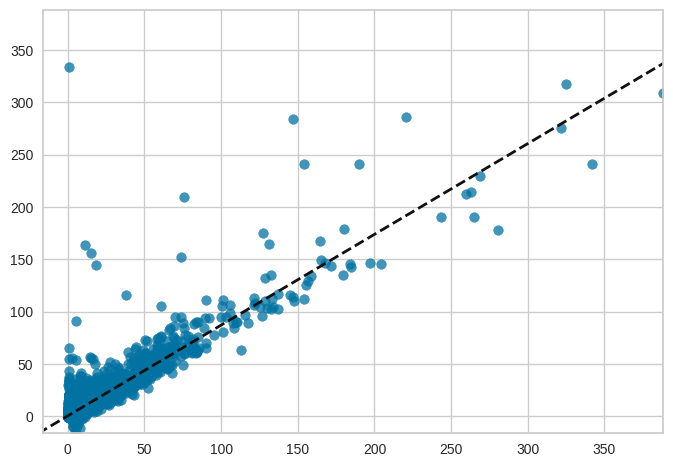

In [71]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [72]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [73]:
### Linear Regression - Trace length
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'trace_len')


In [74]:

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

0.737590235917843

0.737590235917843

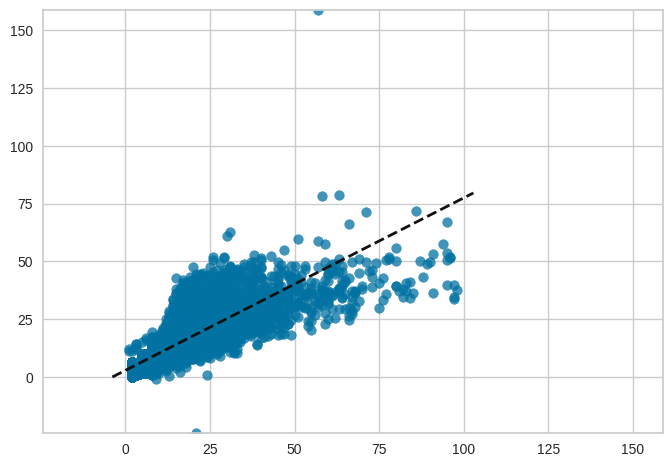

In [75]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [76]:
visualizer.show()  # Finalize and render the figure

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [77]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)

MLPRegressor(max_iter=1000, random_state=1)

In [78]:

regr.score(f_X_test, f_y_test)

0.7850763729718497

0.7850763729718497

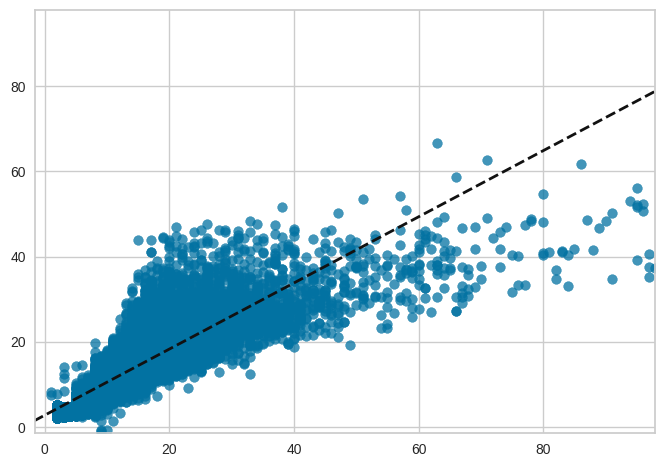

In [79]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data


In [80]:
visualizer.show()  # Finalize and render the figure


<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>